In [5]:
# Dependencies :  pandas, numpy, matplotlib, os, cvs_reader, stats,

In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# reading data and set the DataFrame

In [8]:
# 4 files for 4 years - with only eclipse events

data_file_1 = os.path.join('..','mars_data_raw','context--2008-08-22_2010-07-10--evtf.csv')
data_file_2 = os.path.join('..','mars_data_raw','context--2010-07-10_2012-05-27--evtf.csv')
data_file_3 = os.path.join('..','mars_data_raw','context--2012-05-27_2014-04-14--evtf.csv')
data_file_4 = os.path.join('..','mars_data_raw','context--2014-04-14_2016-03-01--evtf.csv')

# 4 files for 4 years - with all event descriptions 

event_pd1 = pd.read_csv(data_file_1)
event_pd2 = pd.read_csv(data_file_2)
event_pd3 = pd.read_csv(data_file_3)
event_pd4 = pd.read_csv(data_file_4)


data_file_5 = os.path.join('..','mars_data_raw','context--2008-08-22_2010-07-10--ltdata.csv')
data_file_6 = os.path.join('..','mars_data_raw','context--2010-07-10_2012-05-27--ltdata.csv')
data_file_7 = os.path.join('..','mars_data_raw','context--2012-05-27_2014-04-14--ltdata.csv')
data_file_8 = os.path.join('..','mars_data_raw','context--2014-04-14_2016-03-01--ltdata.csv')

data_pd1 = pd.read_csv(data_file_5)
data_pd2 = pd.read_csv(data_file_6)
data_pd3 = pd.read_csv(data_file_7)
data_pd4 = pd.read_csv(data_file_8)


# merge the all the data files to data_full_df

frames_data = [data_pd1,data_pd2,data_pd3,data_pd4]
data_full_df = pd.concat(frames_data,ignore_index=True)


# merge all the the event files to event_full_df

frames = [event_pd1,event_pd2,event_pd3,event_pd4]
event_full_df = pd.concat(frames, ignore_index=True)
event_full_df.head()

,ut_ms,description
0,1219364253000,MLG_LOS_05_/_RTLT_02373
1,1219364356000,NNO_AOS_00_/_RTLT_02373
2,1219365058000,MLG_LOS_02_/_RTLT_02373
3,1219365755000,NNO_AOS_05_/_RTLT_02373
4,1219367159000,NNO_AOS_10_/_RTLT_02374


In [9]:
data_full_df.head()

,ut_ms,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min
0,1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000
1,1219449600000,2.418002e+08,3.563037e+08,19.390075,522.863537,1.783333,26.933333
2,1219536000000,2.416603e+08,3.568432e+08,19.214734,523.468926,0.000000,26.583333
3,1219622400000,2.415193e+08,3.573744e+08,19.039052,524.080161,0.000000,26.100000
4,1219708800000,2.413773e+08,3.578973e+08,18.863029,524.697233,0.000000,25.750000


In [10]:
#defin "round_down"

import math
def round_down(x):
    return int (math.floor(x - 1219363200000	)/1000/60/60/24+1)

In [11]:
# round down the event_full_df
round_event = event_full_df['ut_ms'].apply(round_down)
event_full_df['round_time'] = round_event
event_full_df.head()

,ut_ms,description,round_time
0,1219364253000,MLG_LOS_05_/_RTLT_02373,1
1,1219364356000,NNO_AOS_00_/_RTLT_02373,1
2,1219365058000,MLG_LOS_02_/_RTLT_02373,1
3,1219365755000,NNO_AOS_05_/_RTLT_02373,1
4,1219367159000,NNO_AOS_10_/_RTLT_02374,1


In [12]:
#pick up the eclipse events - Penumbra 'start' and 'end'

ut_ms_list = []
desc_list = []
round_list = []

next (event_full_df.iterrows())
for index, row in event_full_df.iterrows():
    if (row['description'] == "MAR_PENUMBRA_END"):
        ut_ms_list.append (row['ut_ms'])
        desc_list.append (row['description'])
        round_list.append (row['round_time'])
        

event_filter_dict = {'ut_ms': ut_ms_list,
                   'description': desc_list,
                   'round_time': round_list
    
}

event_filter_df = pd.DataFrame(event_filter_dict)

event_filter_df.head()

,ut_ms,description,round_time
0,1219371152000,MAR_PENUMBRA_END,1
1,1219395791000,MAR_PENUMBRA_END,1
2,1219420417000,MAR_PENUMBRA_END,1
3,1219445050000,MAR_PENUMBRA_END,1
4,1219469664000,MAR_PENUMBRA_END,2


In [13]:
# find the duration of each eclipse 
time_start = 0
time_end = 0
duration = []

next (event_full_df.iterrows())
for index, row in event_full_df.iterrows():
    if (row['description']== "MAR_PENUMBRA_START" ):
        time_start = row['ut_ms']

    if (row['description'] == "MAR_PENUMBRA_END"):
        time_end = row['ut_ms']
        duration.append((time_end - time_start)/60/1000)
         
len(duration)

5025

In [14]:
# add "duration" to event _filter_df
event_filter_df['duration'] = duration
event_filter_df.head()

,ut_ms,description,round_time,duration
0,1219371152000,MAR_PENUMBRA_END,1,4.166667
1,1219395791000,MAR_PENUMBRA_END,1,3.750000
2,1219420417000,MAR_PENUMBRA_END,1,3.150000
3,1219445050000,MAR_PENUMBRA_END,1,2.800000
4,1219469664000,MAR_PENUMBRA_END,2,1.783333


In [15]:
#round down the data_full_df
round_data = data_full_df['ut_ms'].apply(round_down)
data_full_df['round_time'] = round_data
data_full_df.head()

,ut_ms,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min,round_time
0,1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,1
1,1219449600000,2.418002e+08,3.563037e+08,19.390075,522.863537,1.783333,26.933333,2
2,1219536000000,2.416603e+08,3.568432e+08,19.214734,523.468926,0.000000,26.583333,3
3,1219622400000,2.415193e+08,3.573744e+08,19.039052,524.080161,0.000000,26.100000,4
4,1219708800000,2.413773e+08,3.578973e+08,18.863029,524.697233,0.000000,25.750000,5


In [16]:
data_full_df["Year"]=""

#assigning year values to "Years" column
#1 martian year = 687 days

martian_year = 687
year = 1

for index,rows in data_full_df.iterrows():
    # remainders 0 to 686
    days = index % martian_year
    
    data_full_df.loc[index,"Year"] = "year" + str(year)
    
    if days == martian_year - 1:
        year+=1
        

In [17]:
#data_full_df.groupby(['Year']).count()

In [18]:
data_full_df.head()

,ut_ms,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min,round_time,Year
0,1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,1,year1
1,1219449600000,2.418002e+08,3.563037e+08,19.390075,522.863537,1.783333,26.933333,2,year1
2,1219536000000,2.416603e+08,3.568432e+08,19.214734,523.468926,0.000000,26.583333,3,year1
3,1219622400000,2.415193e+08,3.573744e+08,19.039052,524.080161,0.000000,26.100000,4,year1
4,1219708800000,2.413773e+08,3.578973e+08,18.863029,524.697233,0.000000,25.750000,5,year1


In [19]:
#adding new columns to check for increasing and decreasing Sun-Mars distance
data_full_df['season'] = ""
data_full_df['group'] = ""
# adding the first row element in "season" column - serves as the previous distance to compare with current distance
if data_full_df['sunmars_km'][0] < data_full_df['sunmars_km'][1]:
    data_full_df['season'][0]=2
    prev_ele = data_full_df['sunmars_km'][0]
else:
    data_full_df['season'][0]=1
    prev_ele = data_full_df['sunmars_km'][0]
#-----------------------------------------------------------------------------
#itering from second row to end
# filling 1 for decreasing Sun-Mars distance , 2 for Sun-Mars increasing distance
for i in range(1,len(data_full_df)):
    #print(i)
    if prev_ele < data_full_df['sunmars_km'][i]:
        data_full_df['season'][i]=2
    else:
        data_full_df['season'][i]=1
    prev_ele=data_full_df['sunmars_km'][i]
data_full_df.head()

C:\Users\mahat\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\mahat\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mahat\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ut_ms,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min,round_time,Year,season,group
0,1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,1,year1,1,
1,1219449600000,2.418002e+08,3.563037e+08,19.390075,522.863537,1.783333,26.933333,2,year1,1,
2,1219536000000,2.416603e+08,3.568432e+08,19.214734,523.468926,0.000000,26.583333,3,year1,1,
3,1219622400000,2.415193e+08,3.573744e+08,19.039052,524.080161,0.000000,26.100000,4,year1,1,
4,1219708800000,2.413773e+08,3.578973e+08,18.863029,524.697233,0.000000,25.750000,5,year1,1,


In [20]:
col_len = len(data_full_df['season'])
start = [0]
stop = []
total_shifts = 1
for i in range(1,col_len):
    if data_full_df['season'][i-1] != data_full_df['season'][i]:
        total_shifts+=1
        start.append(i)
        stop.append(i-1)
stop.append(col_len-1)

In [21]:
for i in range(total_shifts):
    #print(i)
    shift_name = ""
    shift_name = "Distance_shift-" + str(i+1)
    #print(shift_name)
    for j in range(start[i],stop[i]+1):
        #print (i)
        data_full_df["group"][j] = shift_name

C:\Users\mahat\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
data_full_df.head()

,ut_ms,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min,round_time,Year,season,group
0,1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,1,year1,1,Distance_shift-1
1,1219449600000,2.418002e+08,3.563037e+08,19.390075,522.863537,1.783333,26.933333,2,year1,1,Distance_shift-1
2,1219536000000,2.416603e+08,3.568432e+08,19.214734,523.468926,0.000000,26.583333,3,year1,1,Distance_shift-1
3,1219622400000,2.415193e+08,3.573744e+08,19.039052,524.080161,0.000000,26.100000,4,year1,1,Distance_shift-1
4,1219708800000,2.413773e+08,3.578973e+08,18.863029,524.697233,0.000000,25.750000,5,year1,1,Distance_shift-1


In [23]:
#merge event_filter_df and data_full_df into Mars_full_df

mars_full_df = pd.merge(event_filter_df,data_full_df,on = 'round_time')
mars_full_df.head()

,ut_ms_x,description,round_time,duration,ut_ms_y,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min,Year,season,group
0,1219371152000,MAR_PENUMBRA_END,1,4.166667,1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,year1,1,Distance_shift-1
1,1219395791000,MAR_PENUMBRA_END,1,3.750000,1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,year1,1,Distance_shift-1
2,1219420417000,MAR_PENUMBRA_END,1,3.150000,1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,year1,1,Distance_shift-1
3,1219445050000,MAR_PENUMBRA_END,1,2.800000,1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,year1,1,Distance_shift-1
4,1219469664000,MAR_PENUMBRA_END,2,1.783333,1219449600000,2.418002e+08,3.563037e+08,19.390075,522.863537,1.783333,26.933333,year1,1,Distance_shift-1


In [24]:
year = 0
Martian_year = 687
mars_full_df["year"]=""
mars_full_df["day"]=""

# number of yeard from combined data - 4 

year_list = list(data_full_df["Year"].unique())
year_list

# assigning day numbers 1 to 687 for each martain year -- 1 martian year = 687 days

for i in range(len(mars_full_df)):
    if mars_full_df["round_time"][i] % martian_year == 0:
        mars_full_df["day"][i]=Martian_year
  
    else:
        days = mars_full_df["round_time"][i] % martian_year
        mars_full_df["day"][i] = days

        
#assigning year values to "Years" column
#1 martian year = 687 days
                
for j in range(len(year_list)):
    year+=1
    for i in range(len(mars_full_df)):
        if Martian_year*j < mars_full_df["round_time"][i] <= Martian_year*(j+1):
            mars_full_df["year"][i] = year    
            
mars_full_df.head(5)



C:\Users\mahat\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mahat\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\mahat\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ut_ms_x,description,round_time,duration,ut_ms_y,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min,Year,season,group,year,day
0,1219371152000,MAR_PENUMBRA_END,1,4.166667,1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,year1,1,Distance_shift-1,1,1
1,1219395791000,MAR_PENUMBRA_END,1,3.750000,1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,year1,1,Distance_shift-1,1,1
2,1219420417000,MAR_PENUMBRA_END,1,3.150000,1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,year1,1,Distance_shift-1,1,1
3,1219445050000,MAR_PENUMBRA_END,1,2.800000,1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,year1,1,Distance_shift-1,1,1
4,1219469664000,MAR_PENUMBRA_END,2,1.783333,1219449600000,2.418002e+08,3.563037e+08,19.390075,522.863537,1.783333,26.933333,year1,1,Distance_shift-1,1,2


In [25]:
#  select useful column to get the final_df

final_dict = {"eclipse_day":[],
              "duration":[],
              "sunmars_km":[],
              "earthmars_km":[],
              "sunmarsearthangle_deg":[],
              "solarconstantmars":[],
              "year":[],
              "dist_shift":[],
              "day":[]
    
}

final_dict["eclipse_day"] = mars_full_df["round_time"]
final_dict["duration"] = mars_full_df["duration"]
final_dict["sunmars_km"] = mars_full_df["sunmars_km"]
final_dict["earthmars_km"] = mars_full_df["earthmars_km"]
final_dict["sunmarsearthangle_deg"] = mars_full_df["sunmarsearthangle_deg"]
final_dict["solarconstantmars"] = mars_full_df["solarconstantmars"]
final_dict["dist_shift"] = mars_full_df["group"]
final_dict["year"] = mars_full_df["year"]
final_dict["day"]=mars_full_df["day"]


final_df = pd.DataFrame(final_dict)

final_df.head()

,eclipse_day,duration,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,year,dist_shift,day
0,1,4.166667,2.419389e+08,3.557560e+08,19.565076,522.263999,1,Distance_shift-1,1
1,1,3.750000,2.419389e+08,3.557560e+08,19.565076,522.263999,1,Distance_shift-1,1
2,1,3.150000,2.419389e+08,3.557560e+08,19.565076,522.263999,1,Distance_shift-1,1
3,1,2.800000,2.419389e+08,3.557560e+08,19.565076,522.263999,1,Distance_shift-1,1
4,2,1.783333,2.418002e+08,3.563037e+08,19.390075,522.863537,1,Distance_shift-1,2


In [26]:
output_data_file = "final_data.csv"
final_df.to_csv(output_data_file)

In [27]:
#final.groupby('year').count()
year_df = final_df[["year","day","eclipse_day"]]
#year_df

In [28]:
yr_day_grpby = year_df.groupby(["year","day"])

count = yr_day_grpby['eclipse_day'].count()

df = pd.DataFrame({
    "Total Eclipses recorded per day": count
})
final = df.reset_index()
final.head()

,year,day,Total Eclipses recorded per day
0,1,1,4
1,1,2,2
2,1,169,2
3,1,170,4
4,1,171,3


In [29]:
final["cum_count"] = ""
year_list = list(final["year"].unique())   # year list from final data
year_list


#y axis values for each year - getting cumulative count of eclipses for each year
for j in range(len(year_list)):
    cum_value = 0
    for i in range(len(final)):
        if final['year'][i]==year_list[j]:
            #print(final['year'][i])
            cum_value = cum_value  + final["Total Eclipses recorded per day"][i]
            #print(cum_value)
            final["cum_count"][i] = cum_value             

C:\Users\mahat\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
#final[final['year']=='year4']
final.head()

,year,day,Total Eclipses recorded per day,cum_count
0,1,1,4,4
1,1,2,2,6
2,1,169,2,8
3,1,170,4,12
4,1,171,3,15


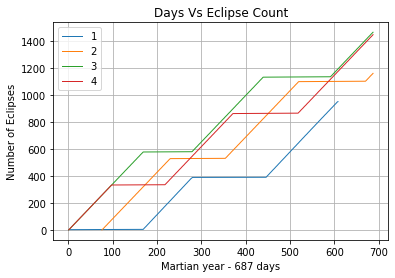

In [31]:
x = [ [] for i in range(len(year_list))]
y = [ [] for i in range(len(year_list))]

martian_year = 687

for j in range(len(year_list)):
    for i in range(len(final)):
        if final['year'][i]==year_list[j]:
            x[j].append(final["day"][i])
            y[j].append(final["cum_count"][i])
            
for j in range(len(year_list)):
    plt.plot(x[j],y[j],label=year_list[j],linewidth=1)
            

plt.xlabel("Martian year - 687 days")
plt.ylabel("Number of Eclipses")
plt.title("Days Vs Eclipse Count")
#plt.xlim(-1,martian_year)
plt.legend(loc = "upper left")
plt.grid()

# Save the Figure
plt.savefig("Days Vs Eclipse Count.png")

#plt.savefig("../Images/Summary_Barchart.png")
plt.show()

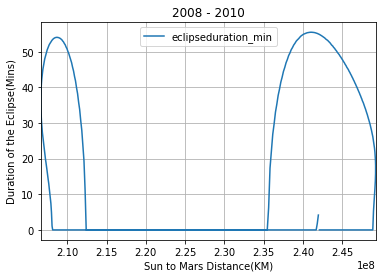

In [32]:
data_pd1.plot.line(x="sunmars_km",y="eclipseduration_min")
plt.xlabel("Sun to Mars Distance(KM)")
plt.ylabel("Duration of the Eclipse(Mins)")
plt.title("2008 - 2010")
plt.grid()
plt.savefig("year1.png")

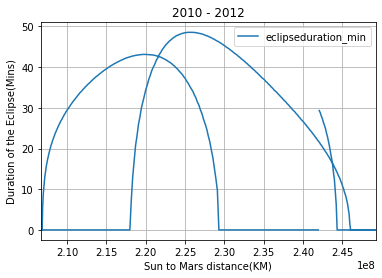

In [33]:
data_pd2.plot.line(x="sunmars_km",y="eclipseduration_min")
plt.xlabel("Sun to Mars distance(KM)")
plt.ylabel("Duration of the Eclipse(Mins)")
plt.title("2010 - 2012")
plt.grid()
plt.savefig("year2.png")

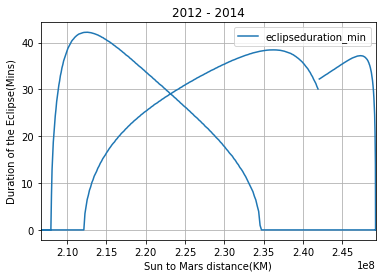

In [34]:
data_pd3.plot.line(x="sunmars_km",y="eclipseduration_min")
plt.title("2012 - 2014")
plt.xlabel("Sun to Mars distance(KM)")
plt.ylabel("Duration of the Eclipse(Mins)")
plt.savefig("Year3.png")
plt.grid()

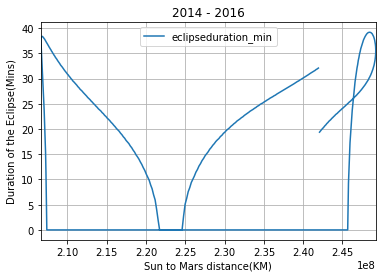

In [35]:
mx = data_pd4["sunmars_km"].max()
mx
mn = data_pd4["sunmars_km"].min()
mn


data_pd4.plot.line(x="sunmars_km",y="eclipseduration_min")
plt.xlabel("Sun to Mars distance(KM)")
plt.ylabel("Duration of the Eclipse(Mins)")
plt.title("2014 - 2016")
plt.xlim(mn-10,mx+1)
plt.grid()
plt.savefig("Year4.png")

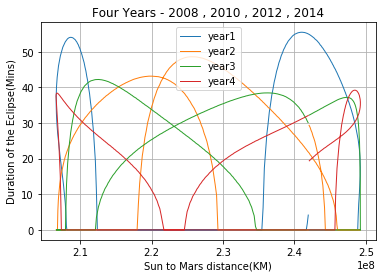

In [36]:
x = [ [] for i in range(len(year_list))]
y = [ [] for i in range(len(year_list))]

year_list = list(data_full_df["Year"].unique())
year_list

#martian_year = 687

for j in range(len(year_list)):
    for i in range(len(data_full_df)):
        if data_full_df['Year'][i]==year_list[j]:
            x[j].append(data_full_df["sunmars_km"][i])
            y[j].append(data_full_df["eclipseduration_min"][i])
            
for j in range(len(year_list)):
    plt.plot(x[j],y[j],label=year_list[j],linewidth=1)
            

plt.xlabel("Sun to Mars distance(KM)")
plt.ylabel("Duration of the Eclipse(Mins)")
plt.title("Four Years - 2008 , 2010 , 2012 , 2014")
plt.savefig("All years.png")
#plt.xlim(-1,martian_year)
plt.legend(loc = "upper center")
plt.grid()
# Save the Figure
plt.savefig("All years.png")

plt.show()

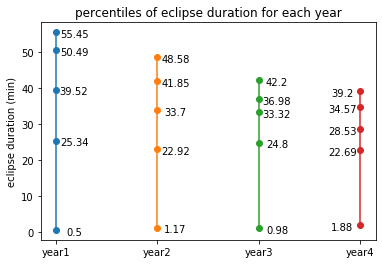

In [37]:
# plot the penctile of duration for each year
x1 = []
x2 = []
x3 = []
x4 = []
for i in range(len(final_df)):
    if final_df['year'][i]== 1:
        x1.append(final_df['duration'][i])
for i in range(len(final_df)):
    if final_df['year'][i]== 2:
        x2.append(final_df['duration'][i])   
for i in range(len(final_df)):
    if final_df['year'][i]== 3:
        x3.append(final_df['duration'][i])
for i in range(len(final_df)):
    if final_df['year'][i]== 4:
        x4.append(final_df['duration'][i])
y1=(np.percentile(x1,(0,25,50,75,100)))
y2=(np.percentile(x2,(0,25,50,75,100)))
y3=(np.percentile(x3,(0,25,50,75,100)))
y4=(np.percentile(x4,(0,25,50,75,100)))


x_axis_1 = [1,1,1,1,1]
x_axis_2 = [2,2,2,2,2]
x_axis_3 = [3,3,3,3,3]
x_axis_4 = [4,4,4,4,4]
z= ["year1",'year2','year3','year4']


plt.xticks([1,2,3,4], z)
plt.ylabel('eclipse duration (min)')


plt.title('percentiles of eclipse duration for each year')


plt.plot(x_axis_1,y1,marker='o')
plt.plot(x_axis_2,y2,marker='o')
plt.plot(x_axis_3,y3,marker='o')
plt.plot(x_axis_4,y4,marker='o')

for x,y in zip(x_axis_1,y1):

    label = "{:.2f}".format(y)

    plt.annotate(round(y,2), # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(18,-5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
    
for x,y in zip(x_axis_2,y2):

    label = "{:.2f}".format(y)

    plt.annotate(round(y,2), # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(18,-5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x,y in zip(x_axis_3,y3):

    label = "{:.2f}".format(y)

    plt.annotate(round(y,2), # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(18,-5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center    
    
for x,y in zip(x_axis_4,y4):

    label = "{:.2f}".format(y)

    plt.annotate(round(y,2), # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-18,-5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center   
    

#plt.savefig('../mars_data_raw/percentiles of eclipse duration for each year.png')    
plt.savefig('percentiles of eclipse duration for each year.png') 

In [38]:
#print the percentile
per_dict = {'year1':y1,
            'year2':y2,
            'year3':y3,
            'year4':y4
    
}

per_pd = pd.DataFrame(per_dict)
per_pd.index = ('P0','P25','P50','P75','P100')
per_pd

,year1,year2,year3,year4
P0,0.5000,1.166667,0.983333,1.883333
P25,25.3375,22.916667,24.800000,22.691667
P50,39.5250,33.700000,33.316667,28.533333
P75,50.4875,41.850000,36.983333,34.566667
P100,55.4500,48.583333,42.200000,39.200000


In [39]:
final_df.groupby(['year']).max()

,eclipse_day,duration,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,dist_shift,day
year,,,,,,,,
1,608,55.450000,2.492207e+08,3.563037e+08,38.634521,715.899348,Distance_shift-3,608
2,1374,48.583333,2.459516e+08,3.559402e+08,38.396133,714.475079,Distance_shift-5,687
3,2061,42.200000,2.492276e+08,3.689899e+08,39.393036,706.462236,Distance_shift-7,687
4,2748,39.200000,2.492389e+08,3.692222e+08,42.552811,716.025624,Distance_shift-9,687


In [40]:
final_df.groupby(['dist_shift']).count()

,eclipse_day,duration,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,year,day
dist_shift,,,,,,,,
Distance_shift-1,266,266,266,266,266,266,266,266
Distance_shift-2,617,617,617,617,617,617,617,617
Distance_shift-3,600,600,600,600,600,600,600,600
Distance_shift-4,569,569,569,569,569,569,569,569
Distance_shift-5,641,641,641,641,641,641,641,641
Distance_shift-6,553,553,553,553,553,553,553,553
Distance_shift-7,756,756,756,756,756,756,756,756
Distance_shift-8,679,679,679,679,679,679,679,679
Distance_shift-9,344,344,344,344,344,344,344,344


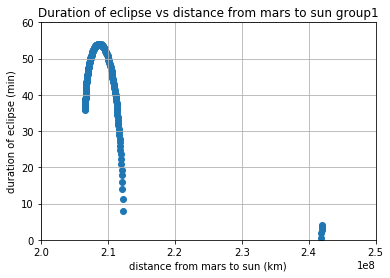

In [41]:
x = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-1" :
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-1" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x)
plt.xlabel('distance from mars to sun (km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun group1')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)

plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun group1.png')

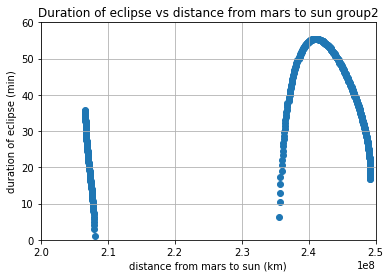

In [42]:
x = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-2" :
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-2" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x)
plt.xlabel('distance from mars to sun (km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun group2')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)

plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun group2.png')

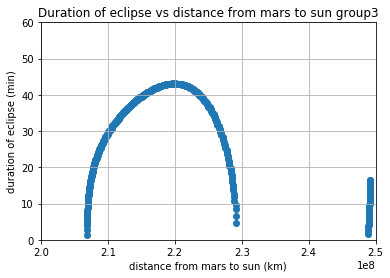

In [43]:
x = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-3" :
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-3" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x)
plt.xlabel('distance from mars to sun (km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun group3')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)

plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun group3.png')

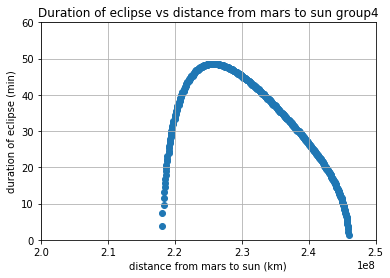

In [44]:
x = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-4" :
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-4" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x)
plt.xlabel('distance from mars to sun (km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun group4')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)

plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun group4.png')

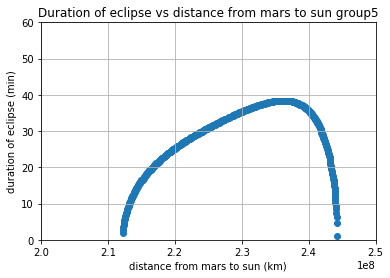

In [45]:
x = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-5" :
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-5" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x)
plt.xlabel('distance from mars to sun (km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun group5')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)

plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun group5.png')

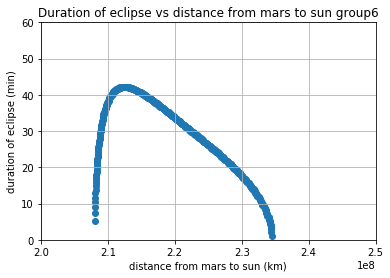

In [46]:
x = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-6" :
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-6" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x)
plt.xlabel('distance from mars to sun (km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun group6')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)

plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun group6.png')

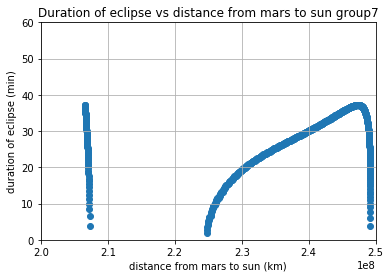

In [47]:
x = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-7" :
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-7" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x)
plt.xlabel('distance from mars to sun (km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun group7')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)

plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun group7.png')

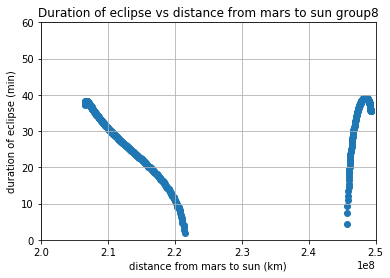

In [48]:
x = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-8" :
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-8" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x)
plt.xlabel('distance from mars to sun (km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun group8')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)

plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun group8.png')

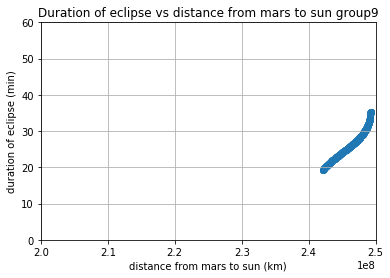

In [49]:
x = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-9" :
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['dist_shift'][i] == "Distance_shift-9" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x)
plt.xlabel('distance from mars to sun (km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun group9')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)

plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun group9.png')

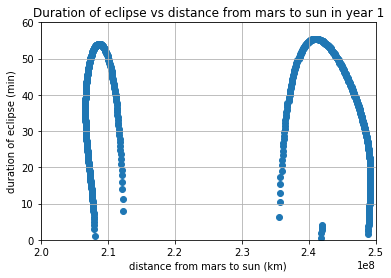

In [50]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 1:
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 1 :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun (km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 1')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)

plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 1.png')

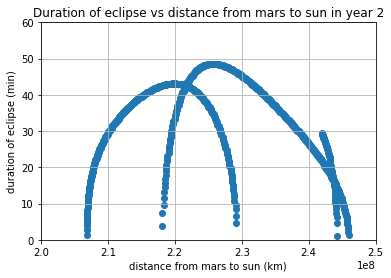

In [51]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 2:
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 2 :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun (km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 2')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)

plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 2.png')

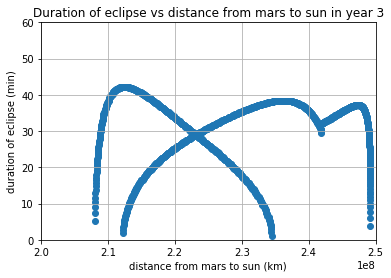

In [52]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 3:
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 3 :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun (km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 3')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)


plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 3.png')

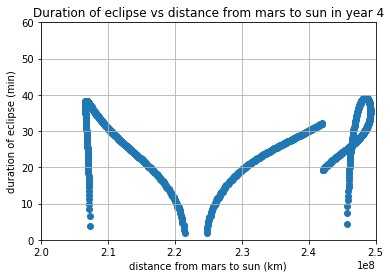

In [53]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 4:
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 4 :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun (km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 4')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)
plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 4.png')

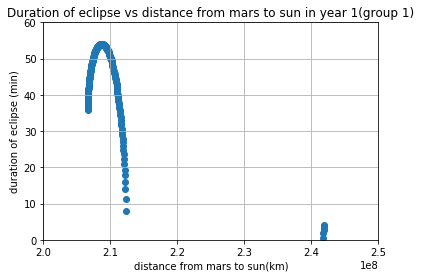

In [54]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 1 and final_df['dist_shift'][i]=="Distance_shift-1":
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 1 and final_df['dist_shift'][i]=="Distance_shift-1" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun(km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 1(group 1)')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)
plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 1_group1.png')

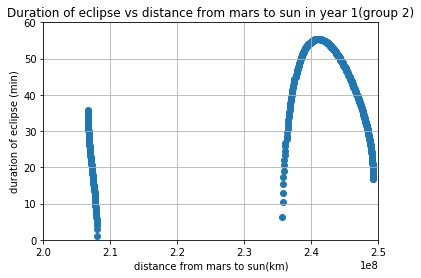

In [55]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 1 and final_df['dist_shift'][i]=="Distance_shift-2":
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 1 and final_df['dist_shift'][i]=="Distance_shift-2" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun(km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 1(group 2)')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)
plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 1_group2.png')

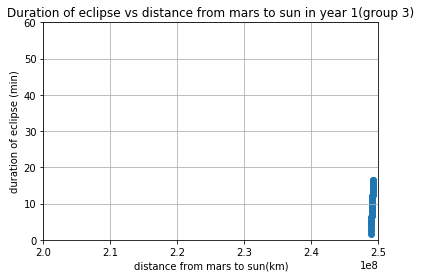

In [56]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 1 and final_df['dist_shift'][i]=="Distance_shift-3":
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 1 and final_df['dist_shift'][i]=="Distance_shift-3" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun(km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 1(group 3)')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)
plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 1_group3.png')

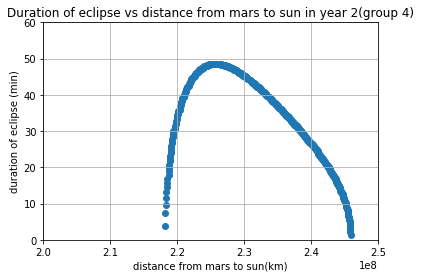

In [57]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 2 and final_df['dist_shift'][i]=="Distance_shift-4":
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 2 and final_df['dist_shift'][i]=="Distance_shift-4" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun(km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 2(group 4)')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)
plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 2_group1.png')

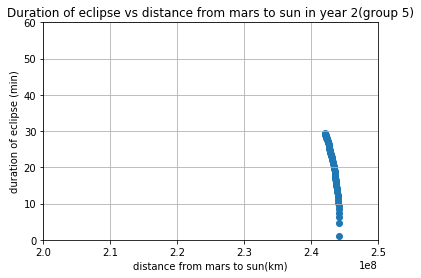

In [58]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 2 and final_df['dist_shift'][i]=="Distance_shift-5":
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 2 and final_df['dist_shift'][i]=="Distance_shift-5" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun(km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 2(group 5)')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)
plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 2_group2.png')

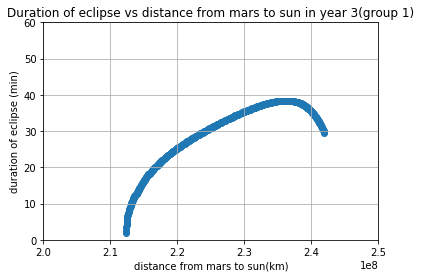

In [59]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 3 and final_df['dist_shift'][i]=="Distance_shift-5":
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 3 and final_df['dist_shift'][i]=="Distance_shift-5" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun(km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 3(group 1)')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)
plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 3_group1.png')

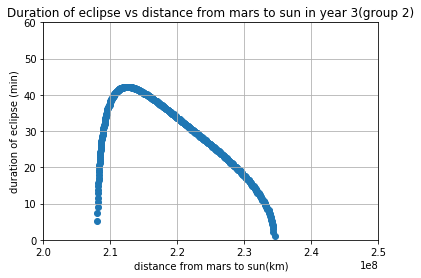

In [60]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 3 and final_df['dist_shift'][i]=="Distance_shift-6":
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 3 and final_df['dist_shift'][i]=="Distance_shift-6" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun(km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 3(group 2)')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)
plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 3_group2.png')

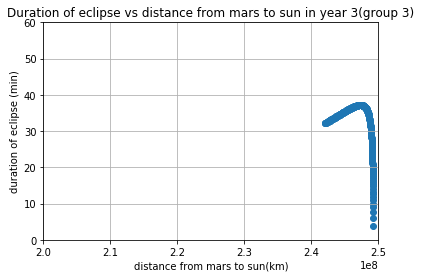

In [61]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 3 and final_df['dist_shift'][i]=="Distance_shift-7":
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 3 and final_df['dist_shift'][i]=="Distance_shift-7" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun(km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 3(group 3)')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)
plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 3_group3.png')

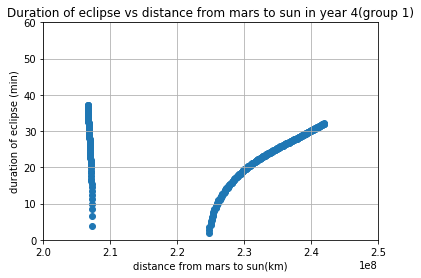

In [62]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 4 and final_df['dist_shift'][i]=="Distance_shift-7":
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 4 and final_df['dist_shift'][i]=="Distance_shift-7" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun(km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 4(group 1)')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)
plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 4_group1.png')

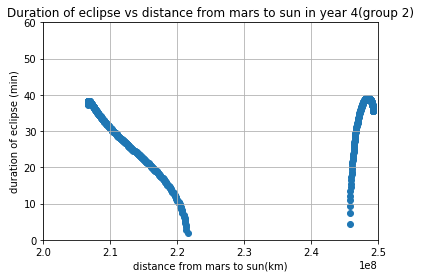

In [63]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 4 and final_df['dist_shift'][i]=="Distance_shift-8":
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 4 and final_df['dist_shift'][i]=="Distance_shift-8" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun(km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 4(group 2)')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)
plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 4_group2.png')

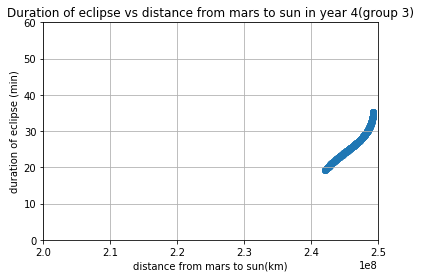

In [64]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 4 and final_df['dist_shift'][i]=="Distance_shift-9":
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 4 and final_df['dist_shift'][i]=="Distance_shift-9" :
        y.append(final_df['sunmars_km'][i])
        

        
plt.scatter(y,x,)

plt.xlabel('distance from mars to sun(km)')
plt.ylabel('duration of eclipse (min)')
plt.title ('Duration of eclipse vs distance from mars to sun in year 4(group 3)')
plt.grid(True)
plt. xlim(2.0e+08,2.5e+08)
plt.ylim(0,60)
plt.savefig('../mars_data_raw/Duration of eclipse vs distance from mars to sun in year 4_group3.png')

In [65]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 1:
        x.append(final_df['duration'][i])

print (np.percentile(x,50))
# print(x)

39.525


In [66]:
df1=final_df.groupby(['eclipse_day','year']).count()
df2 =df1.reset_index()
df2.head(3)

,eclipse_day,year,duration,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,dist_shift,day
0,1,1,4,4,4,4,4,4,4
1,2,1,2,2,2,2,2,2,2
2,169,1,2,2,2,2,2,2,2


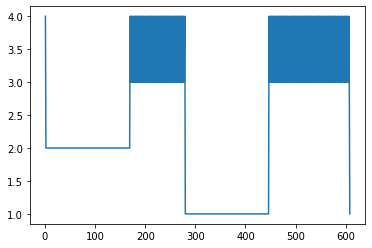

In [67]:
x = []
y = []
for i in range(len(df2)):
    if df2['year'][i]==1:
        x.append(df2['duration'][i])
        
for i in range(len(df2)):
    if df2['year'][i]==1:
        y.append(df2['eclipse_day'][i])
        

        
plt.plot(y,x)

In [68]:
df1.index[1467]

(2748, 4)

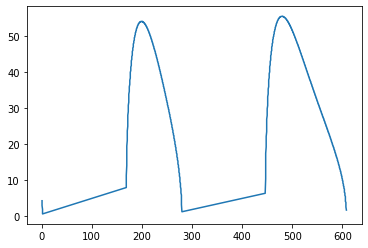

In [69]:
x = []
for i in range(len(final_df)):
    if final_df['year'][i] == 1:
        x.append(final_df['duration'][i])
        
y = []
for i in range(len(final_df)):
    if final_df['year'][i] == 1 :
        y.append(final_df['eclipse_day'][i])
        

        
plt.plot(y,x,)

In [70]:
df3=final_df.groupby(['year']).count()
df4=df3.reset_index()
df4

,year,eclipse_day,duration,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,dist_shift,day
0,1,952,952,952,952,952,952,952,952
1,2,1161,1161,1161,1161,1161,1161,1161,1161
2,3,1465,1465,1465,1465,1465,1465,1465,1465
3,4,1447,1447,1447,1447,1447,1447,1447,1447


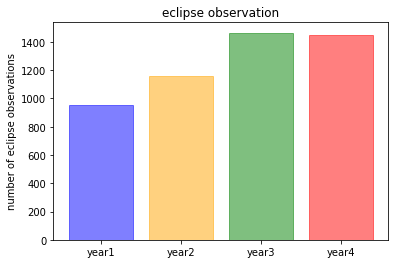

In [71]:
x = []
y = []

for i in range(len(df4)):
    x.append(df4['year'][i])
    
z = []    
for i in x:
    i =( "year"+ str(i))
    z.append(i)
    

    
for i in range(len(df4)):
    y.append(df4['duration'][i])
    
y_pos = np.arange(len(x))
bar_list = plt.bar(y_pos, y, align='center', alpha=0.5)
plt.xticks(y_pos, z)
plt.ylabel('number of eclipse observations')

plt.title('eclipse observation')
bar_list[0].set_color('blue')
bar_list[1].set_color('orange')
bar_list[2].set_color('green')
bar_list[3].set_color('red')


plt.savefig('../mars_data_raw/eclipse observation for years.png')

In [72]:
#data_full_df

In [73]:
# Total number of events

In [74]:
unique_events = event_full_df.description.unique()
#unique_events

In [75]:
num_unique_events = len(unique_events)
num_unique_events

113477

In [76]:
# Q1: how many times the eclipses happened per year?

In [77]:
# group the event_full and count the times of eclipses : count the Mar_penumbra_start

In [78]:
year_df.groupby(["year"]).count()

,day,eclipse_day
year,,
1,952,952
2,1161,1161
3,1465,1465
4,1447,1447


In [79]:
# Q2: the average number of eclipses happened in 4 year?

In [80]:
# groupby and find the mean()

In [81]:
year_df.groupby(["year"]).mean()

,eclipse_day
year,
1,400.797269
2,1006.726960
3,1688.112628
4,2422.856945


In [104]:
# Q3: is the duration related to the distances to sun?

In [ ]:
Based on the patterns on for all years (Duration of the Eclipse Vs SunMars distance) , there is no specific pattern that
says the duration is related SunMars distance

In [ ]:
# get the duration of eclipses and add to the data_full

In [ ]:
# split the data_full to few parts depends on the comparison of distance to sun (from away to closer)